# Microsoft Movie Recommendations

## You've got to ask yourself one question: "Do I feel lucky?"

Below are some takeaways from an analysis of movie data for Microsoft to potentially get into making movies.

Import necessary tools for project here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")

Load data files here

In [2]:
title_basics_df = pd.read_csv ('zippedData/imdb.title.basics.csv.gz')
title_ratings_df = pd.read_csv ('zippedData/imdb.title.ratings.csv.gz')
movie_gross_df = pd.read_csv ('zippedData/bom.movie_gross.csv.gz')
movie_budgets_df = pd.read_csv ('zippedData/tn.movie_budgets.csv.gz')

In [3]:
print (title_basics_df.info())
title_basics_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
print (title_ratings_df.info())
title_ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
print(movie_gross_df.info())
movie_gross_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
print (movie_budgets_df.info())
movie_budgets_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Which Month is the Most Popular for Releases?

## If you build it, he will come.

In [7]:
# Quick check on the data
movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [8]:
# Quick check on the data
movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [9]:
#check for duplicates or commonly reoccuring values
for col in movie_budgets_df:
    print (f'Currently check values from column: {col}')
    print (f'Top 5 values: \n {movie_budgets_df[col].value_counts(normalize = True)[:5]}')
    print ('-----------------------------')

Currently check values from column: id
Top 5 values: 
 4     0.010031
53    0.010031
61    0.010031
65    0.010031
69    0.010031
Name: id, dtype: float64
-----------------------------
Currently check values from column: release_date
Top 5 values: 
 Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2012    0.002248
Name: release_date, dtype: float64
-----------------------------
Currently check values from column: movie
Top 5 values: 
 Home                            0.000519
King Kong                       0.000519
Halloween                       0.000519
Pet Sematary                    0.000346
20,000 Leagues Under the Sea    0.000346
Name: movie, dtype: float64
-----------------------------
Currently check values from column: production_budget
Top 5 values: 
 $20,000,000    0.039952
$10,000,000    0.036666
$30,000,000    0.030612
$15,000,000    0.029920
$25,000,000    0.029575
Name: production_budget, dtype: float64
---------

Data looks clean! Let's use it!


In [10]:
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df ['release_m'] = movie_budgets_df['release_date'].dt.month
movie_budgets_df.reset_index (drop=True, inplace= True)
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_m
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",5
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",12


[Text(0.5, 0, 'Released Month'), Text(0, 0.5, 'Counts')]

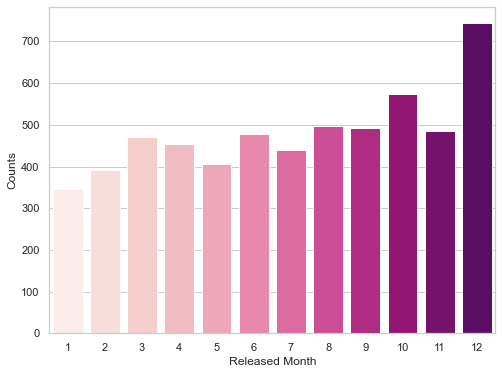

In [11]:
fig = plt.figure(figsize= (8,6))
ax = sns.countplot(x='release_m', data= movie_budgets_df, palette= 'RdPu')
ax.set(xlabel='Released Month', ylabel= 'Counts')

December looks like the most popular month to release a movie, followed by October.

January is the least popular month for movie releases.

...But does that mean these movies make money? Or is that just a time when people decide to release them?

## Show me the money!

First, turn strings to integers and remove '$' and ','

In [12]:
def convert_to_int(df, col):
    df[col] = df[col].str.replace('$','').str.replace(',', '').astype('int')
    return df

In [13]:
cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols_to_convert:
    movie_budgets_df = convert_to_int(movie_budgets_df, col)

In [14]:
#Did it work?
movie_budgets_df.info()
# movie_budgets_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   release_m          5782 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 316.3+ KB


Now that everything is in a form we can work with, let's see how it looks!

[Text(0.5, 0, 'Month Released'), Text(0, 0.5, 'Domestic Gross')]

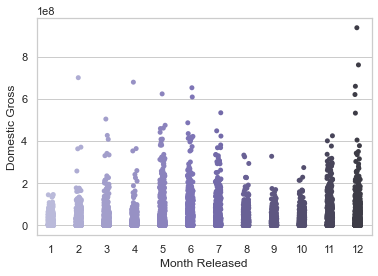

In [15]:
dom_month_img = sns.stripplot(x= 'release_m', y= 'domestic_gross', data=movie_budgets_df, palette= 'Purples_d')
dom_month_img.set (xlabel= 'Month Released', ylabel= 'Domestic Gross')

In [16]:
dom_gross_df = movie_budgets_df.sort_values (by= 'domestic_gross', ascending= False)

In [17]:
dom_gross_df.reset_index(drop=True, inplace=True)
dom_gross_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_m
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,12
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,12
2,42,2018-02-16,Black Panther,200000000,700059566,1348258224,2
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,4
4,43,1997-12-19,Titanic,200000000,659363944,2208208395,12
5,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,6
6,27,2012-05-04,The Avengers,225000000,623279547,1517935897,5
7,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12
8,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,6
9,75,2008-07-18,The Dark Knight,185000000,533720947,1001996207,7


Using the graph, we can see that movies that are released in December do well in the box office (domestically). Out of the top 10 movies that made the most, 4 were released in December.

## Of all the gin joints in all the towns in all the world...
But what about worldwide? Does December prove a good month for that too?

[Text(0.5, 0, 'Month Released'), Text(0, 0.5, 'Worldwide Gross')]

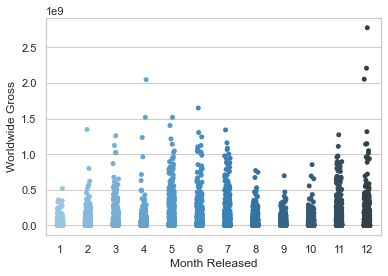

In [18]:
world_month_img = sns.stripplot (x= 'release_m', y= 'worldwide_gross', data = movie_budgets_df, palette= 'Blues_d')
world_month_img.set (xlabel= 'Month Released', ylabel= 'Worldwide Gross')

In [19]:
world_gross_df = movie_budgets_df.sort_values(by= 'worldwide_gross', ascending= False)

In [20]:
world_gross_df.reset_index(drop=True, inplace= True)
world_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_m
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,12
1,43,1997-12-19,Titanic,200000000,659363944,2208208395,12
2,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,12
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,4
4,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,6


In [21]:
# Looking at the plots above, it looks like December has some very high outliers
# but more plots are at the bottom. 
# Does releasing a movie in December make the most money?
movie_budgets_df.groupby('release_m').mean()
# movie_budgets_df.groupby('release_m').median()
#And it doesn't!

,id,production_budget,domestic_gross,worldwide_gross
release_m,,,,
1,50.060519,2.084349e+07,2.394962e+07,4.656382e+07
2,50.650510,2.804642e+07,3.541465e+07,7.154453e+07
3,49.917021,3.078208e+07,3.857299e+07,8.063337e+07
4,51.121145,2.380283e+07,2.732840e+07,5.992026e+07
5,50.555283,4.713520e+07,6.669795e+07,1.622680e+08
6,50.102296,4.309912e+07,6.582791e+07,1.425230e+08
7,50.104545,4.254616e+07,6.072804e+07,1.409636e+08
8,52.475806,2.555609e+07,3.216821e+07,6.097841e+07
9,48.488844,2.181290e+07,2.314989e+07,4.669369e+07


<AxesSubplot:xlabel='release_m', ylabel='worldwide_gross'>

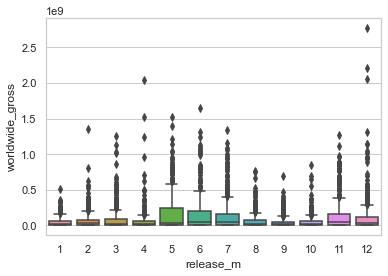

In [22]:
sns.boxplot(x='release_m', y= 'worldwide_gross', data= movie_budgets_df)

Maybe we can cut out some outliers and get a closer look...

In [23]:
# make new DataFrame with some outliers removed to see rest of data in detail
remv_outliers_df = movie_budgets_df.sort_values(by = 'worldwide_gross')[:5350]
remv_outliers_df.reset_index (drop= True, inplace=True)

In [24]:
# remv_outliers_df.head()

[Text(0.5, 0, 'Month of Release'), Text(0, 0.5, 'Worldwide Gross')]

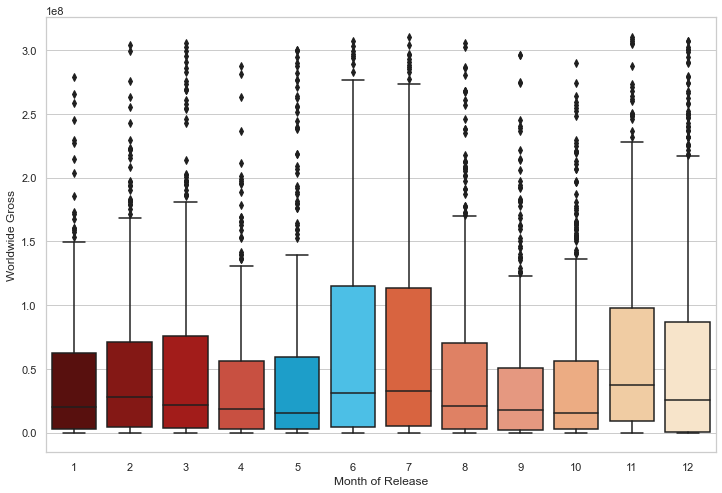

In [25]:
plt.figure (figsize= (12, 8))

colors = ['#640402','#960603', '#b80604', '#de3f2b', '#00ace6',  '#33ccff', '#f15627', '#f4764f', '#f68f6f', '#fda872', '#fdcd96', '#fee5c3']
sns.set_palette (sns.color_palette(colors))

mon_gross_box_img = sns.boxplot(x='release_m', y= 'worldwide_gross', data= remv_outliers_df)
mon_gross_box_img.set (xlabel= 'Month of Release', ylabel= 'Worldwide Gross')


Interesting! But what would it look like if we took out more outliers?

In [26]:
# make new DataFrame with more outliers removed to see rest of data in detail
fewer_outliers_df = movie_budgets_df.sort_values(by = 'worldwide_gross')[:5100]
fewer_outliers_df.reset_index (drop= True, inplace=True)

[Text(0.5, 0, 'Month of Release'), Text(0, 0.5, 'Worldwide Gross')]

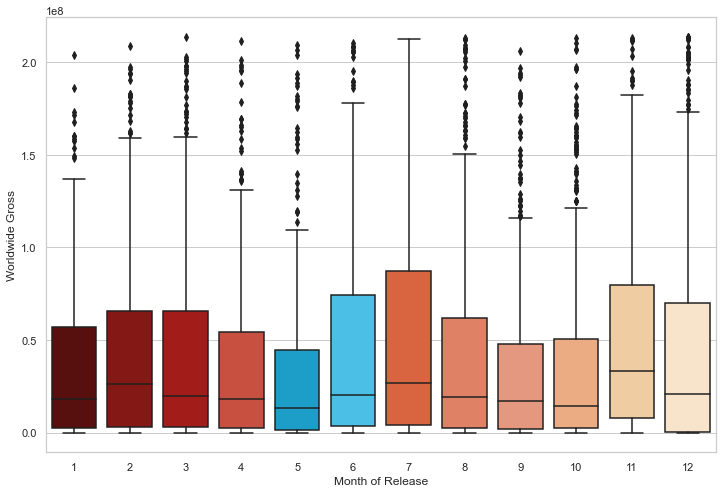

In [27]:
plt.figure (figsize= (12, 8))

colors = ['#640402','#960603', '#b80604', '#de3f2b', '#00ace6',  '#33ccff', '#f15627', '#f4764f', '#f68f6f', '#fda872', '#fdcd96', '#fee5c3']
sns.set_palette (sns.color_palette(colors))

few_outliers_box_img = sns.boxplot(x='release_m', y= 'worldwide_gross', data= fewer_outliers_df)
few_outliers_box_img.set (xlabel= 'Month of Release', ylabel= 'Worldwide Gross')

WHOA! June really starts to show itself as a decent month to release a film. May starts looking not as good.

# What are the Top 15 Highest Grossing Films and Which Studios Made Them?

## Elementary, my dear Watson

Let's take a look at some reviews, the highest grossing movies, and the studios that made them.

In [28]:
# Let's start with a file and see how much cleaning it needs
title_basics_df.isna().any()
title_basics_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [29]:
movie_budgets_df.sort_values (by= 'release_m', ascending= False, inplace= True)
movie_budgets_df.reset_index(drop=True, inplace=True)

Going to drop the runtime_minutes column. Not going to do an analysis with it and it has such a large amount of missing data. Don't want to delete all of entries because there is still some good information there.

In [30]:
new_title_basics_df = title_basics_df.drop(columns = 'runtime_minutes', axis = 1)

In [31]:
new_title_basics_df.isna().sum() / len (new_title_basics_df)

tconst            0.000000
primary_title     0.000000
original_title    0.000144
start_year        0.000000
genres            0.037005
dtype: float64

I'd really like to do some analysis in genres. It looks like I can stand to lose 3.7% of data and a very small amount due to the 'original_title' missing. I'll go ahead and drop all that.

In [32]:
new_title_basics_df.dropna (axis = 0, inplace=True)

In [33]:
#did it work? YEP!
new_title_basics_df.isna().sum()

tconst            0
primary_title     0
original_title    0
start_year        0
genres            0
dtype: int64

In [34]:
#And we still have plenty of data to work with
len (new_title_basics_df) 

140734

Going to join another file and then see the other missing values that are present.

In [35]:
titles_together_df = pd.merge(new_title_basics_df, title_ratings_df, how = 'left', left_on = 'tconst', right_on = 'tconst')

In [36]:
# len (titles_together_df)
# titles_together_df.head()
titles_together_df.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
genres                0
averagerating     67682
numvotes          67682
dtype: int64

In [37]:
titles_together_df.isna().sum() / len (titles_together_df)

tconst            0.000000
primary_title     0.000000
original_title    0.000000
start_year        0.000000
genres            0.000000
averagerating     0.480921
numvotes          0.480921
dtype: float64

WHOA! Almost 50% of our data is null for 'averagerating' and 'numvotes'!

We are going to merge in a much smaller DataFrame, so there is a good chance a lot of those will fall off.

In [38]:
#Merge movie_gross_df to the titles df to be able to analyze studios, ratings, money made, and genres
titles_and_gross_df = pd.merge(movie_gross_df, titles_together_df, how = 'inner', left_on= 'title', right_on= 'primary_title')

In [39]:
titles_and_gross_df.isna().sum() / len (titles_and_gross_df)

title             0.000000
studio            0.000902
domestic_gross    0.007216
foreign_gross     0.393867
year              0.000000
tconst            0.000000
primary_title     0.000000
original_title    0.000000
start_year        0.000000
genres            0.000000
averagerating     0.092002
numvotes          0.092002
dtype: float64

Let's get rid of those pesky NaN values!
But I don't want to lose over a third of my data, so I'm going to drop the foreign_gross column (along with some other columns) and just look at domestic_gross. 
Then I'll drop the NaN values.

In [40]:
titles_and_gross_df = titles_and_gross_df.drop (['foreign_gross', 'primary_title', 'original_title', 'tconst'], axis = 1)

In [41]:
titles_and_gross_df.dropna(axis= 0, inplace= True)

In [42]:
titles_and_gross_df.isna().sum()
# len (titles_and_gross_df)
# titles_and_gross_df.head()

title             0
studio            0
domestic_gross    0
year              0
start_year        0
genres            0
averagerating     0
numvotes          0
dtype: int64

In [43]:
titles_and_gross_df = titles_and_gross_df.sort_values (by= ['domestic_gross'], ascending= False)
titles_and_gross_df.reset_index(drop=True, inplace=True)

In [44]:
titles_and_gross_df.head(15)

,title,studio,domestic_gross,year,start_year,genres,averagerating,numvotes
0,Black Panther,BV,700100000.0,2018,2018,"Action,Adventure,Sci-Fi",7.3,516148.0
1,Avengers: Infinity War,BV,678800000.0,2018,2018,"Action,Adventure,Sci-Fi",8.5,670926.0
2,Jurassic World,Uni.,652300000.0,2015,2015,"Action,Adventure,Sci-Fi",7.0,539338.0
3,Star Wars: The Last Jedi,BV,620200000.0,2017,2017,"Action,Adventure,Fantasy",7.1,462903.0
4,Incredibles 2,BV,608600000.0,2018,2018,"Action,Adventure,Animation",7.7,203510.0
5,Rogue One: A Star Wars Story,BV,532200000.0,2016,2016,"Action,Adventure,Sci-Fi",7.8,478592.0
6,Finding Dory,BV,486300000.0,2016,2016,"Adventure,Animation,Comedy",7.3,213542.0
7,Avengers: Age of Ultron,BV,459000000.0,2015,2015,"Action,Adventure,Sci-Fi",7.3,665594.0
8,The Dark Knight Rises,WB,448100000.0,2012,2012,"Action,Thriller",8.4,1387769.0
9,The Hunger Games: Catching Fire,LGF,424700000.0,2013,2013,"Action,Adventure,Sci-Fi",7.5,575455.0


WHOA! I see some duplicates! Let's get rid of those.

In [45]:
# dup_df = titles_and_gross_df.duplicated(subset = 'title')
# dup_df.sum()
# Does that say 417 duplicates?!

In [46]:
#How about we drop those guys!
titles_and_gross_df= titles_and_gross_df.drop_duplicates(subset = 'title').reset_index(drop= True)

In [47]:
len (titles_and_gross_df)
# titles_and_gross_df.head(15)

2580

Finally!

Duplicates are gone, as are NaN values. 

Let's get to work!

In [48]:
titles_and_gross_df.head()

,title,studio,domestic_gross,year,start_year,genres,averagerating,numvotes
0,Black Panther,BV,700100000.0,2018,2018,"Action,Adventure,Sci-Fi",7.3,516148.0
1,Avengers: Infinity War,BV,678800000.0,2018,2018,"Action,Adventure,Sci-Fi",8.5,670926.0
2,Jurassic World,Uni.,652300000.0,2015,2015,"Action,Adventure,Sci-Fi",7.0,539338.0
3,Star Wars: The Last Jedi,BV,620200000.0,2017,2017,"Action,Adventure,Fantasy",7.1,462903.0
4,Incredibles 2,BV,608600000.0,2018,2018,"Action,Adventure,Animation",7.7,203510.0


[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, 'Top 15 Highest Grossing Films')]

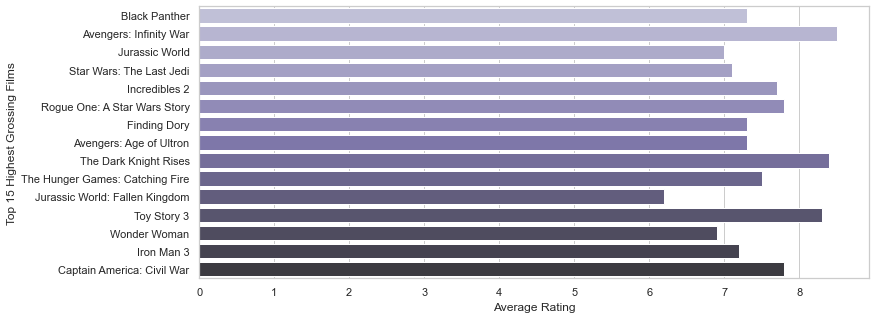

In [49]:
plt.figure(figsize= (12,5))
rating_gross_img = sns.barplot(x= 'averagerating', y= 'title', data= titles_and_gross_df[:15], palette= 'Purples_d')
rating_gross_img.set (xlabel = 'Average Rating', ylabel = 'Top 15 Highest Grossing Films')

## Nobody puts BV in a corner.

Hmmm. Even though Jurassic World: Fallen Kingdom did well in the box office, the audience members that reviewed it did not like it.

Now let's take a look at the studios that make these movies:

In [50]:
# DataFrame of only top 15 grossing movies
top_fifteen_df = titles_and_gross_df[:15]

[Text(0.5, 0, 'Studio'), Text(0, 0.5, '# of Top 15 Movies')]

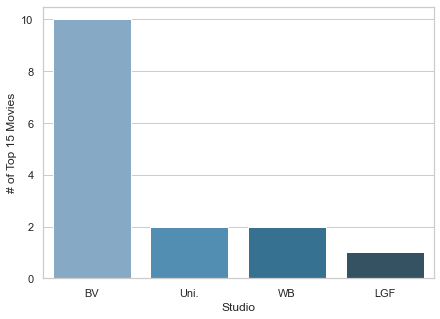

In [51]:
plt.figure(figsize= (7,5))
count_studio_img = sns.countplot (x = 'studio', data= top_fifteen_df, palette='PuBu_d')
count_studio_img.set (xlabel= 'Studio', ylabel= '# of Top 15 Movies')

WHOA! It looks like if you want a hit, better look to see what "BV" or Buena Vista (AKA Disney), is doing. They have made ten out of the top fifteen highest grossing movies!

# Which Genres have the best Return on Investment?

## Alright, alright, alright. 

Let's link-up some files and do some cleaning.

In [52]:
movie_budgets_df['difference'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']
#Find the net profit

In [53]:
movie_budgets_df['roi'] = (movie_budgets_df['difference'] / movie_budgets_df['production_budget']) * 100
movie_budgets_df['roi'] = movie_budgets_df['roi'].round(2)
#Get the ROI by dividing the net profit by the budget and then multiply by 100 to get into a percent

There are our two new columns! Let's run a quick analysis on the movies with the greatest ROI.

In [54]:
movie_budgets_df = movie_budgets_df.sort_values (by= ['roi'], ascending= False)
movie_budgets_df.reset_index(drop=True, inplace=True)

In [55]:
movie_budgets_df.head(15)
# Hmmmm... Looking at the years, most of these movies are over 20 years old. 
# Let's see if we can find some newer data to look at.

#But already it looks like Horror or Thriller-type movies have an excellent ROI

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_m,difference,roi
0,46,1972-06-30,Deep Throat,25000,45000000,45000000,6,44975000,179900.00
1,14,1980-03-21,Mad Max,200000,8750000,99750000,3,99550000,49775.00
2,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,9,193733034,43051.79
3,80,2015-07-10,The Gallows,100000,22764410,41656474,7,41556474,41556.47
4,7,1999-07-14,The Blair Witch Project,600000,140539099,248300000,7,247700000,41283.33
5,10,2004-05-07,Super Size Me,65000,11529368,22233808,5,22168808,34105.86
6,47,1942-08-13,Bambi,858000,102797000,268000000,8,267142000,31135.43
7,74,1993-02-26,El Mariachi,7000,2040920,2041928,2,2034928,29070.40
8,77,1968-10-01,Night of the Living Dead,114000,12087064,30087064,10,29973064,26292.16
9,11,1976-11-21,Rocky,1000000,117235147,225000000,11,224000000,22400.00


In [56]:
# Let's make a year column so we can sort (and eliminate) them easier
movie_budgets_df ['release_y'] = movie_budgets_df ['release_date'].dt.year

In [57]:
# Now we can arrange them by the newest years first
movie_budgets_df.sort_values(by= ['release_y'], ascending= False, inplace=True)
movie_budgets_df.reset_index(drop=True, inplace=True)

In [58]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_m,difference,roi,release_y
0,36,2020-02-21,Call of the Wild,82000000,0,0,2,-82000000,-100.00,2020
1,95,2020-12-31,Moonfall,150000000,0,0,12,-150000000,-100.00,2020
2,6,2020-12-31,Hannibal the Conqueror,50000000,0,0,12,-50000000,-100.00,2020
3,75,2019-05-03,Long Shot,40000000,30202860,43711031,5,3711031,9.28,2019
4,81,2019-05-24,Aladdin,182000000,246734314,619234314,5,437234314,240.24,2019


In [59]:
# Well, it looks like there are some new ones that haven't made any money. 
# That isn't really helpful, so let's look at worldwide gross and take out any values of "0"
movie_budgets_df['worldwide_gross']= movie_budgets_df['worldwide_gross'].replace(0, np.nan)
movie_budgets_df.dropna(inplace= True)
movie_budgets_df.reset_index (inplace=True, drop=True)

In [60]:
#Much better!
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_m,difference,roi,release_y
0,75,2019-05-03,Long Shot,40000000,30202860,43711031.0,5,3711031,9.28,2019
1,81,2019-05-24,Aladdin,182000000,246734314,619234314.0,5,437234314,240.24,2019
2,21,2019-02-08,What Men Want,20000000,54611903,69911903.0,2,49911903,249.56,2019
3,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350.0,6,-200237650,-57.21,2019
4,86,2019-02-14,Fighting With My Family,11000000,22958583,39049922.0,2,28049922,255.00,2019


In [61]:
# Now we can eliminate some older movies. 
# Honestly, it seems like looking at movie trends from 
# the past ten years would be the most helpful.
recent_movie_budgets_df = movie_budgets_df[:2140]
len(recent_movie_budgets_df)
# recent_movie_budgets_df.head()

2140

Let's merge the cleaned up ROI with the original DataFrame that has the genres in it.

In [62]:
genres_and_roi_df = pd.merge(recent_movie_budgets_df, title_basics_df, how= 'inner', left_on= 'movie', right_on= 'primary_title'  )

In [63]:
# genres_and_roi_df.head()
genres_and_roi_df.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
release_m              0
difference             0
roi                    0
release_y              0
tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes      188
genres                31
dtype: int64

In [64]:
# Drop columns with NaN values before dropping NaN to reduce loss of data for genres
genres_and_roi_df.drop(columns= ['original_title', 'runtime_minutes', 'tconst', 'start_year'], inplace= True)

In [65]:
# Now drop those missing values
genres_and_roi_df.dropna(axis=0, inplace= True)

In [66]:
print (len (genres_and_roi_df))
genres_and_roi_df.isna().sum()

2366


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_m            0
difference           0
roi                  0
release_y            0
primary_title        0
genres               0
dtype: int64

In [67]:
#Better check for duplicates!
dupd_df = genres_and_roi_df[genres_and_roi_df.duplicated(subset= 'movie')]
dupd_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_m,difference,roi,release_y,primary_title,genres
1,75,2019-05-03,Long Shot,40000000,30202860,43711031.0,5,3711031,9.28,2019,Long Shot,"Biography,Documentary"
3,81,2019-05-24,Aladdin,182000000,246734314,619234314.0,5,437234314,240.24,2019,Aladdin,Fantasy
9,93,2019-01-25,Serenity,25000000,8547045,11367029.0,1,-13632971,-54.53,2019,Serenity,"Drama,Mystery,Sci-Fi"
29,72,2019-05-03,The Intruder,8000000,35095904,36005871.0,5,28005871,350.07,2019,The Intruder,"Drama,Horror,Mystery"
32,100,2019-01-18,Glass,20000000,111035005,245303505.0,1,225303505,1126.52,2019,Glass,"Crime,Horror,Mystery"
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,36,2009-04-22,Earth,47000000,32011576,116773317.0,4,69773317,148.45,2009,Earth,"Documentary,Fantasy,Mystery"
2388,36,2009-04-22,Earth,47000000,32011576,116773317.0,4,69773317,148.45,2009,Earth,Documentary
2389,36,2009-04-22,Earth,47000000,32011576,116773317.0,4,69773317,148.45,2009,Earth,Drama
2390,36,2009-04-22,Earth,47000000,32011576,116773317.0,4,69773317,148.45,2009,Earth,Documentary


In [68]:
# Whoa! 684 rows! Let's investigate some.
genres_and_roi_df[genres_and_roi_df.movie == 'Us']
# After checking a few different ones, it looks like all duplicates are exactly that.
# Get 'em outta here!

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_m,difference,roi,release_y,primary_title,genres
39,88,2019-03-22,Us,20000000,175006930,254210310.0,3,234210310,1171.05,2019,Us,Drama
40,88,2019-03-22,Us,20000000,175006930,254210310.0,3,234210310,1171.05,2019,Us,Comedy
41,88,2019-03-22,Us,20000000,175006930,254210310.0,3,234210310,1171.05,2019,Us,"Horror,Mystery,Thriller"


In [69]:
genres_and_roi_df.drop_duplicates(subset='movie', inplace= True)
genres_and_roi_df.reset_index(drop=True, inplace=True)
# genres_and_roi_df.head(10)

YAY! Now we can work on those genres.

In [70]:
genres_and_roi_df['genres_split'] = genres_and_roi_df['genres'].map (lambda x: x.split(',') if x else x) 
# genres_and_roi_df.head()

In [71]:
all_genres = set ()
for genre in genres_and_roi_df['genres_split']:
    if genre:
        all_genres.update(genre)

In [72]:
y = 'N/A'
genres_and_roi_df['one_genre'] = genres_and_roi_df['genres_split'].map (lambda x: x[0])
genres_and_roi_df['two_genre'] = genres_and_roi_df['genres_split'].map (lambda x: y if len(x) < 2 else x[1])
genres_and_roi_df['three_genre'] = genres_and_roi_df['genres_split'].map (lambda x: y if len (x) < 3 else x[2])

Great! Now that we have the genres separated let's get rid of columns we don't need and check these puppies out!

In [73]:
genres_and_roi_df.drop (columns= ['genres', 'genres_split'], inplace= True)
# genres_and_roi_df.head()

In [74]:
genres_and_roi_df.sort_values(by= ['one_genre'], ascending= True, inplace=True)
genres_and_roi_df.reset_index(drop=True, inplace=True)

genres_and_roi_df.sort_values(by= ['two_genre'], ascending= True, inplace=True)
genres_and_roi_df.reset_index(drop=True, inplace=True)

genres_and_roi_df.sort_values(by= ['three_genre'], ascending= True, inplace=True)
genres_and_roi_df.reset_index(drop=True, inplace=True)

<AxesSubplot:title={'center':'Third Genre Listed'}, xlabel='count', ylabel='three_genre'>

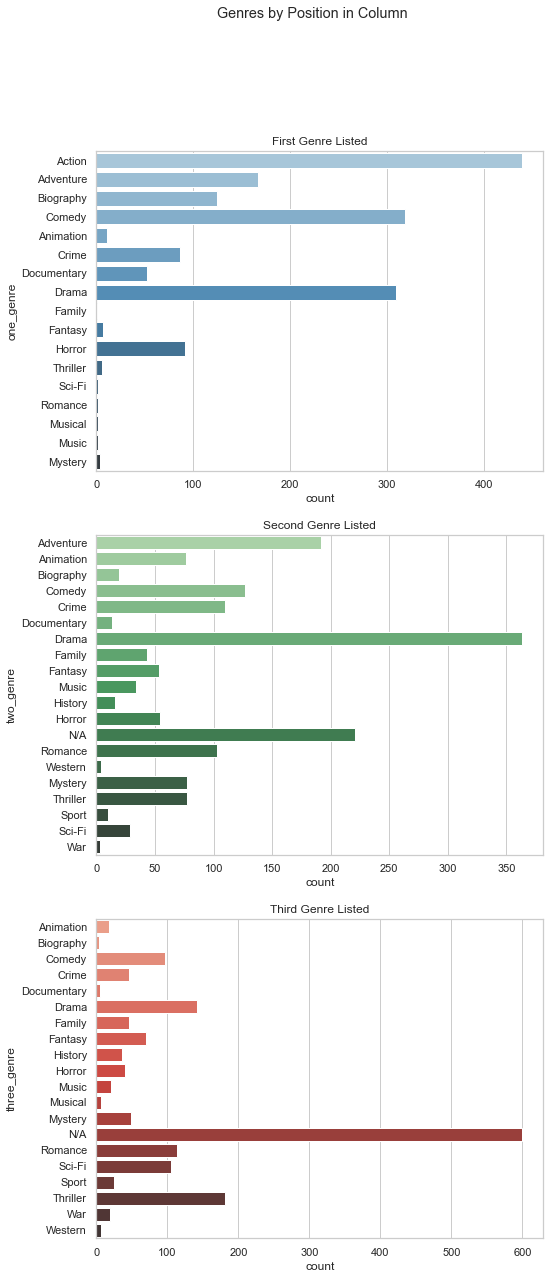

In [75]:
fig, axes = plt.subplots (3, 1, figsize = (8, 20))

fig.suptitle('Genres by Position in Column')

axes[0].set_title ('First Genre Listed')
axes[1].set_title ('Second Genre Listed')
axes[2].set_title ('Third Genre Listed')

sns.countplot (ax= axes[0], y= 'one_genre', data= genres_and_roi_df, palette= 'Blues_d')
sns.countplot (ax= axes[1], y= 'two_genre', data= genres_and_roi_df, palette= 'Greens_d')
sns.countplot (ax= axes[2], y= 'three_genre', data= genres_and_roi_df, palette= 'Reds_d')

Looks like action and drama are the real winners when looking at the movies that have been released in the past ten years. What else can we look at?

Maybe genre and ROI?

In [76]:
grouped_genres_df = genres_and_roi_df.groupby(by= ['one_genre'], as_index= False).sum()
grouped_genres2_df = genres_and_roi_df.groupby(by= ['two_genre'], as_index= False).sum()
grouped_genres3_df = genres_and_roi_df.groupby (by=['three_genre'], as_index= False).sum()

<AxesSubplot:title={'center':'Third Genre Listed'}, xlabel='roi', ylabel='three_genre'>

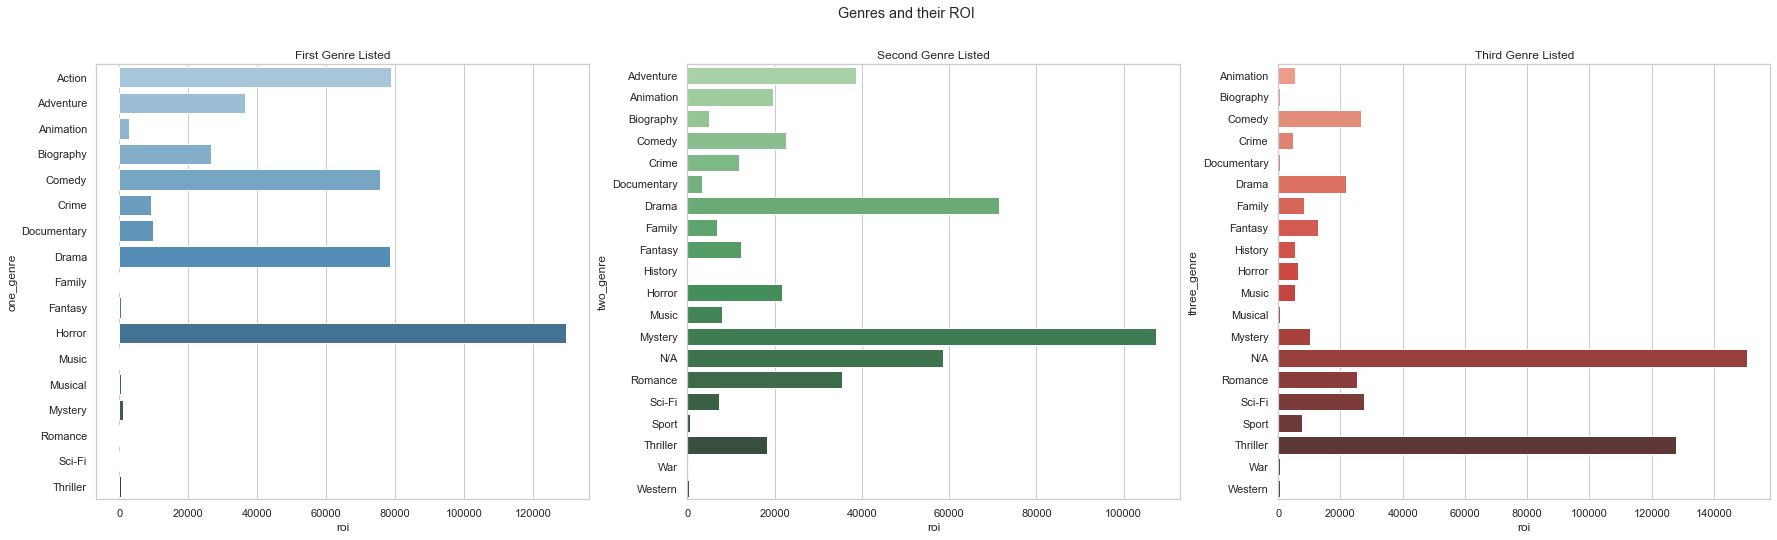

In [77]:
fig, axes = plt.subplots (1, 3, figsize= (30, 8))

fig.suptitle ('Genres and their ROI')
axes[0].set_title ('First Genre Listed')
axes[1].set_title ('Second Genre Listed')
axes[2].set_title ('Third Genre Listed')

sns.barplot (ax= axes[0], x= 'roi', y= 'one_genre', data= grouped_genres_df, palette= 'Blues_d')
sns.barplot (ax= axes[1], x= 'roi', y= 'two_genre', data= grouped_genres2_df, palette= 'Greens_d')
sns.barplot (ax= axes[2], x= 'roi', y= 'three_genre', data= grouped_genres3_df, palette= 'Reds_d')

In [78]:
#Is that right? Well, let's check
genres_and_roi_df[genres_and_roi_df.one_genre == 'Horror']
# genres_and_roi_df[genres_and_roi_df.two_genre == 'Mystery']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_m,difference,roi,release_y,primary_title,one_genre,two_genre,three_genre
658,39,2014-09-26,Plastic,10000000,0,575371.0,9,-9424629,-94.25,2014,Plastic,Horror,N/A,N/A
659,49,2011-08-12,Final Destination 5,40000000,42587643,155011165.0,8,115011165,287.53,2011,Final Destination 5,Horror,N/A,N/A
660,77,2018-02-06,Blood Feast,1200000,8708,8708.0,2,-1191292,-99.27,2018,Blood Feast,Horror,N/A,N/A
669,72,2019-05-03,The Intruder,8000000,35095904,36005871.0,5,28005871,350.07,2019,The Intruder,Horror,N/A,N/A
671,12,2012-01-06,The Devil Inside,1000000,53262945,101759490.0,1,100759490,10075.95,2012,The Devil Inside,Horror,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,80,2018-08-10,Slender Man,10000000,30564825,51723644.0,8,41723644,417.24,2018,Slender Man,Horror,Mystery,Thriller
1545,81,2012-08-31,The Possession,14000000,49130588,82925064.0,8,68925064,492.32,2012,The Possession,Horror,Mystery,Thriller
1546,51,2011-10-21,Paranormal Activity 3,5000000,104028807,207039844.0,10,202039844,4040.80,2011,Paranormal Activity 3,Horror,Mystery,Thriller
1547,69,2012-10-12,Sinister,3000000,48086903,87727807.0,10,84727807,2824.26,2012,Sinister,Horror,Mystery,Thriller


## It's alive! It's alive!

Welp. It looks like if you want to make a decent return on your investment, give making a horror/mystery/thriller a go!

Of course, it's important to point out that a lot of those movies will contain all three of those genres in that order, making them all successes. If the campy horror flicks don't suit you, drama hits high on the list as well.

We saw before that Action/Adventure movies do well in box offices, but it looks like the cost to make them cuts into the profits.

But what happens if we take out the outliers? Of course we want an instant hit, but what if you wanted to play it safe? Let's find the genres that would usually hit a home run (or strike out).

In [79]:
# group genres by median
median_genres_df = genres_and_roi_df.groupby(by= ['one_genre'], as_index= False).median()
median_genres2_df = genres_and_roi_df.groupby(by= ['two_genre'], as_index= False).median()
median_genres3_df = genres_and_roi_df.groupby (by=['three_genre'], as_index= False).median()

<AxesSubplot:title={'center':'Third Genre Listed'}, xlabel='roi', ylabel='three_genre'>

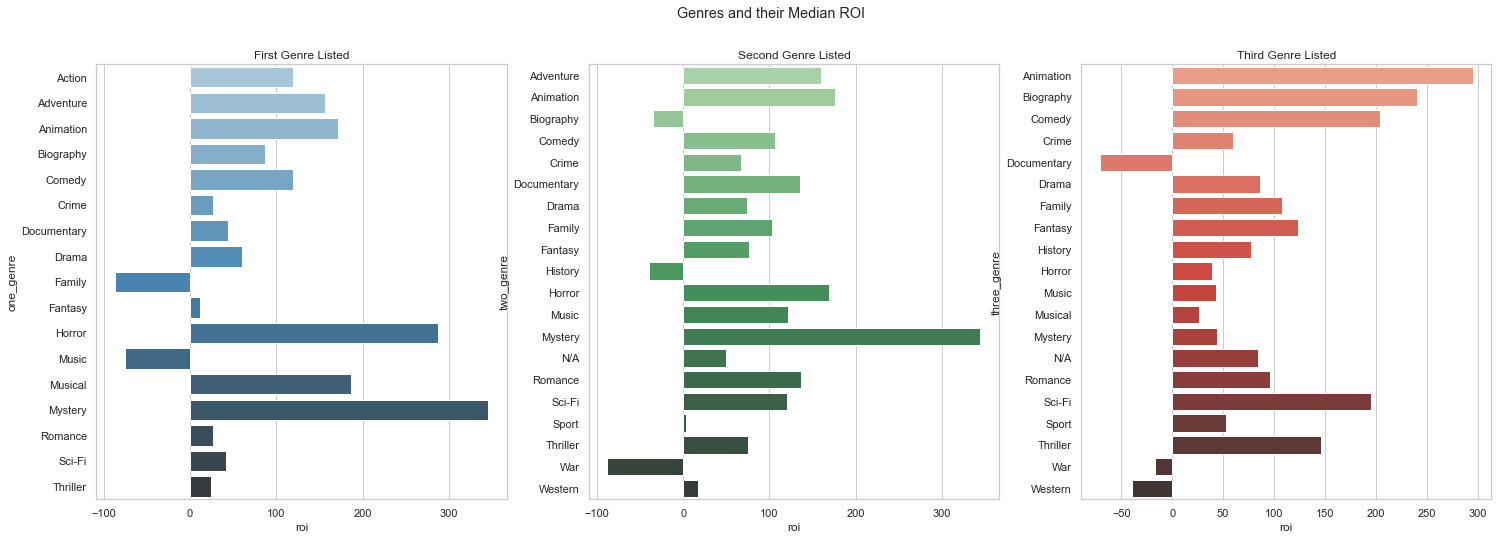

In [80]:
# plot it and see how it compares
fig, axes = plt.subplots (1, 3, figsize= (25, 8))

fig.suptitle ('Genres and their Median ROI')
axes[0].set_title ('First Genre Listed')
axes[1].set_title ('Second Genre Listed')
axes[2].set_title ('Third Genre Listed')

sns.barplot (ax= axes[0], x= 'roi', y= 'one_genre', data= median_genres_df, palette= 'Blues_d')
sns.barplot (ax= axes[1], x= 'roi', y= 'two_genre', data= median_genres2_df, palette= 'Greens_d')
sns.barplot (ax= axes[2], x= 'roi', y= 'three_genre', data= median_genres3_df, palette= 'Reds_d')

## Aaalll righty then.

Looks like mystery could be a safe bet. Whether it was the only genre, or listed with multiple genres, it tends to crank out a decent return. 

# How do Movies and Microsoft go together?

With one of Microsoft's biggest hits!
No, I'm not talking about Microsoft Office, I'm talking about the XBox and video games.

## Here's lookin' at you kid.

Why not look into Microsoft for hits they already have?
And no, I'm not talking about Microsoft Office or DOS. I'm talking about the XBox and video games!

Movies and video games go hand-in-hand. Microsoft making movies based on their best-selling video games can stir up immediate interest as well as create opportunities to increase revenue in the game sector as well.

First, we need to get some video game data. I looked for the best-selling Xbox One games specifically. If we are looking to generate money or attention, the Xbox One is not outdated like the original Xbox or Xbox 360, but not as new as the newest Xbox X or S. The data for Xbox One will be recent and substantial.

Here is the data that was used:
https://en.wikipedia.org/wiki/List_of_best-selling_Xbox_One_video_games

In [81]:
#Let's get that table into a DataFrame
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_best-selling_Xbox_One_video_games')

In [82]:
#And pick the table we want to keep
top_xbox_games_df = df[2]

In [83]:
#How does it look?
top_xbox_games_df.info()
# top_xbox_games_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   No.              32 non-null     int64 
 1   Game             32 non-null     object
 2   Copies sold      32 non-null     object
 3   Release date[a]  32 non-null     object
 4   Genre(s)         32 non-null     object
 5   Developer(s)     32 non-null     object
 6   Publisher(s)     32 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.9+ KB


In [84]:
# We've got data! But the column names needs some help.
# And the data type for copies sold and release date could be better
top_xbox_games_df.rename(columns= {'Genre(s)' : 'Genre', 'Copies sold': 'Copies_sold', \
                                   'Release date[a]': 'Release_date', 'Developer(s)': 'Developer', \
                                  'Publisher(s)': 'Publisher', 'No.': 'Rank'}, inplace= True)

In [85]:
# remove characters from copies_sold and change to float
top_xbox_games_df['Copies_sold']= top_xbox_games_df['Copies_sold'].map(lambda x: x[:4])
top_xbox_games_df['Copies_sold']= top_xbox_games_df['Copies_sold'].str.rstrip(' mi')
top_xbox_games_df['Copies_sold']= top_xbox_games_df['Copies_sold'].str.rstrip (' ')
top_xbox_games_df['Copies_sold'][29] = '1.16'
top_xbox_games_df['Copies_sold'] = top_xbox_games_df['Copies_sold'].astype(float)

<ipython-input-85-1040a1c464e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_xbox_games_df['Copies_sold'][29] = '1.16'


In [86]:
# change date to datetime
# add column for just release year
top_xbox_games_df['Release_date'] = pd.to_datetime(top_xbox_games_df['Release_date'])
top_xbox_games_df['Release_year'] = top_xbox_games_df['Release_date'].dt.year

In [87]:
# add column that says if the Publisher is or is not Microsoft
top_xbox_games_df['is_Microsoft'] = ["Yes" if i=="Microsoft Studios" else "No" for i in top_xbox_games_df["Publisher"]]

In [88]:
#How'd we do?
top_xbox_games_df.info()
# top_xbox_games_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          32 non-null     int64         
 1   Game          32 non-null     object        
 2   Copies_sold   32 non-null     float64       
 3   Release_date  32 non-null     datetime64[ns]
 4   Genre         32 non-null     object        
 5   Developer     32 non-null     object        
 6   Publisher     32 non-null     object        
 7   Release_year  32 non-null     int64         
 8   is_Microsoft  32 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 2.4+ KB


## The plot thickens

Now that the data is cleaned up and looking pretty, let's see how it looks!

In [89]:
org_publisher_df = top_xbox_games_df.sort_values (by= 'Publisher')
org_publisher_df.reset_index(inplace= True, drop= True)
# org_publisher_df.head()

<AxesSubplot:xlabel='count', ylabel='Publisher'>

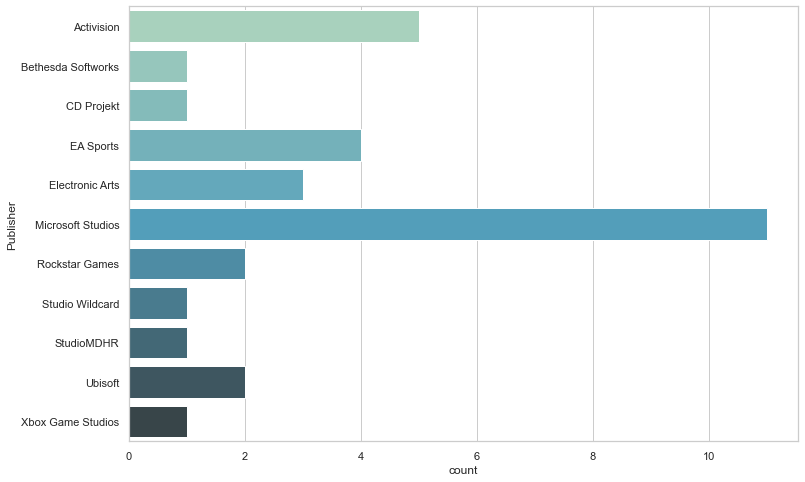

In [90]:
plt.figure (figsize= (12, 8))
sns.countplot (y= 'Publisher', data= org_publisher_df, palette= 'GnBu_d')

Microsoft is definitely leading the way in making the highest selling Xbox One games.

<Figure size 576x576 with 0 Axes>

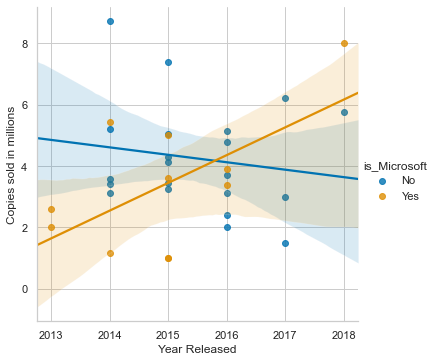

In [91]:
plt.figure (figsize= (8,8))
ax = sns.lmplot(x='Release_year', y='Copies_sold',
               hue='is_Microsoft', data= top_xbox_games_df, truncate=False, legend_out= True, palette= 'colorblind')
ax.set (xlabel= 'Year Released', ylabel= 'Copies sold in millions')

## Say "hello" to my little friend!

Well, hey there! Everything in orange, including that orange line going up is Microsoft!
I see that orange dot at the top of the graph on the year 2018. What's that?

In [92]:
micro_only_df = org_publisher_df[14:25]

In [93]:
micro_only_df = micro_only_df.sort_values(by= 'Rank')
micro_only_df.reset_index (inplace= True, drop=True)
# micro_only_df

[Text(0.5, 0, 'Copies Sold in Millions')]

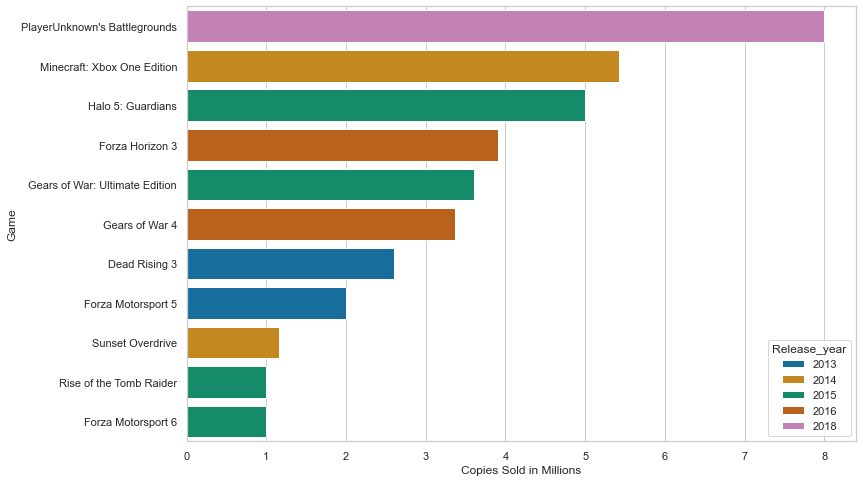

In [94]:
plt.figure (figsize= (12, 8))
games_img = sns.barplot(x= 'Copies_sold', y='Game', data= micro_only_df, hue= 'Release_year', dodge= False, palette= 'colorblind')
games_img.set (xlabel = 'Copies Sold in Millions')

Here we can see Microsoft's top-selling Xbox One games, the year they were released, and the amount of copies sold by millions. 

If someone is trying to decide on what to make a movie about, starting here could be helpful.

# Summary


## May the force be with you.

1. December is a great month to release a new movie and the 25th or 31st are popular days.

2. Buena Vista (AKA Disney) is making a two thirds of the highest grossing movies. Consider teaming up with them or seeking their formula for success.

3. Horror/ Thriller / Mystery movies provide good return on investment. Drama is fairly close too.

4. Consider your current successful video games for inspiration. Can lead to increase in revenue in multiple markets.

Future Analysis ideas:

* In the future, spending extra time looking into PlayerUnknown's Battlegrounds and how it has been so successful in a short amount of time could be helpful.

* Looking at the best-selling video games that are offered on the newest Xbox for the freshest perspective should show some interesting trends. The longest running video games and why they have maintained their popularity may also prove helpful.

* An analysis on the success of movies that came from video games and vice versa could be enlightening.

* The recent hightest grossing movies seems to be sequels/ series/ franchises/ universes. Examine if this is the best path to take.

* Look into nostalgia-related items that lead to successfull movies (based on books, comics, childhood memories, etc.)

* Look at revisiting highest grossing movies that were adjusted for inflation. Top movies there that are not part of a series include Gone With the Wind, Titanic, and E.T.

* Investigate alternate ways of releasing the movie considering the pandemic will prevent people from visiting movie theaters.

Thank you.